<img src='../__docs/__all/notebook_rules.png' />

**Workflow of this notebook**

* **User**: select the images to work with.
* *Notebook*: load images
* **User**: rotate the images to make sure the sample to work with is perfectly vertical
* **User**: select region to work with by cropping the raw data
* *OPTIONAL*: **User** export the cropped images
* **User**: select part of the image that does not contain the sample
* **User**: select part of the image that does containt the sample
* *Notebook*: remove background from sample part
* *Notebook*: display profiles
* *Notebook*: apply geometry correction to all profiles
* **User**: select where to output the images corrected, profiles ascii files and metadata file.

# Python Import 

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib notebook

from __code import system
system.System.select_working_dir()

from ipts_27939_code.ipts_27939 import IPTS_27939


** Using Debugging Mode! **


# Select Images 

In [2]:
o_ipts = IPTS_27939(working_dir=system.System.get_working_dir())
o_ipts.select_images()

# Visualize Raw Data

The data are rotated 90 degrees to work with the cylindrical geometry algorithm

<IPython.core.display.Javascript object>


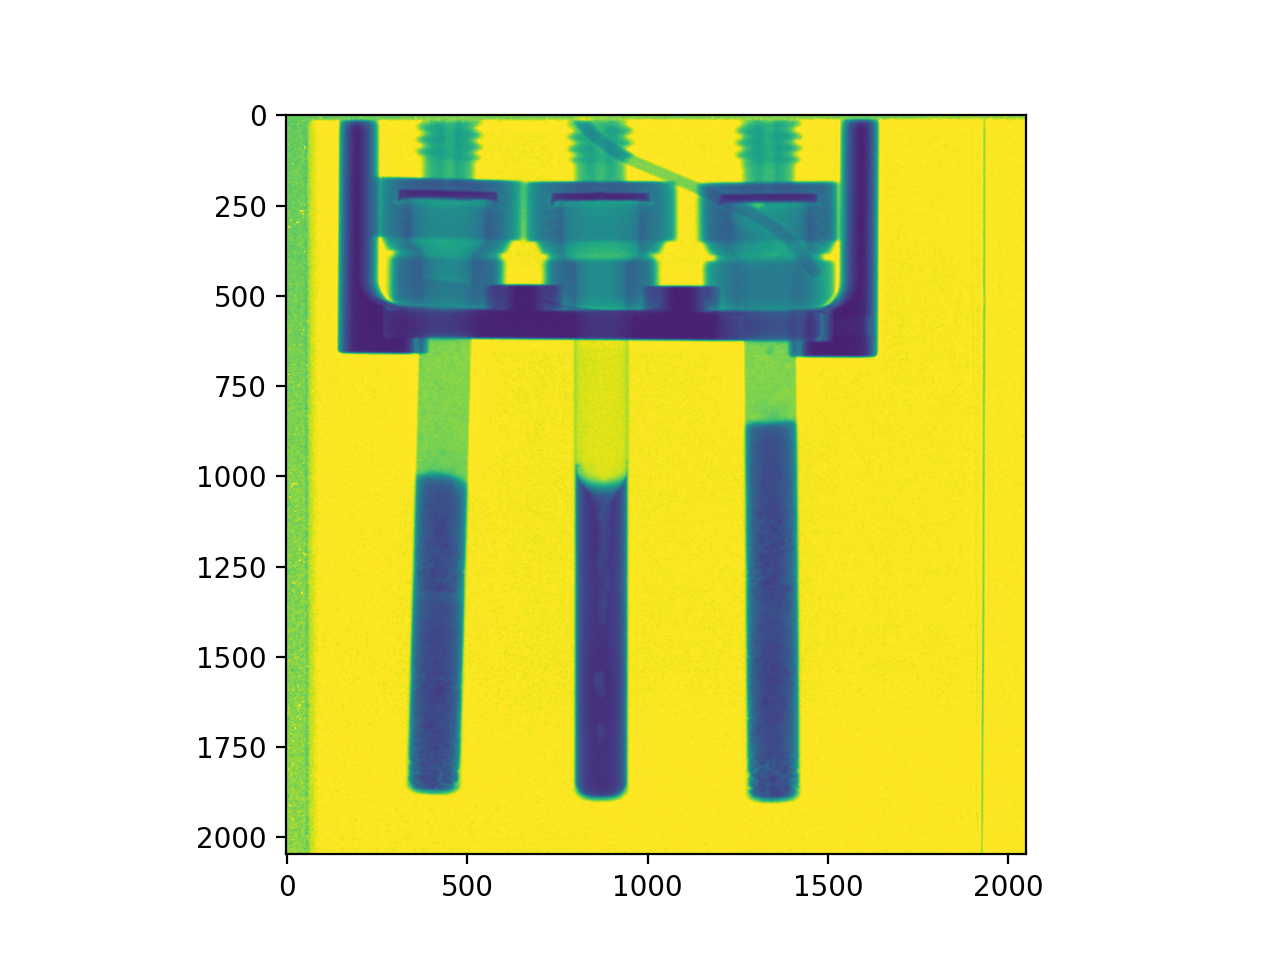

interactive(children=(IntSlider(value=0, description='image_index', layout=Layout(width='50%'), max=3), Output…

In [3]:
o_ipts.visualize_raw_images()

# Rotate sample to make sure it's perfectly vertical

Use the **vertical guide** to help you find the perfect vertical to your sample.

<img src='ipts_27939_code/static/example_of_bad_and_good_alignments.png' />

Feel free to use the **green** and **blue** horizontal profiles helper to make sure the sample is perfectly vertical. To do so, place one of the two profile helper near the top of the sampel and the other one, near the bottom and make sure the edge is perfectly aligned top to bottom.

<img src='ipts_27939_code/static/example_rotation_guides.png' />

<IPython.core.display.Javascript object>


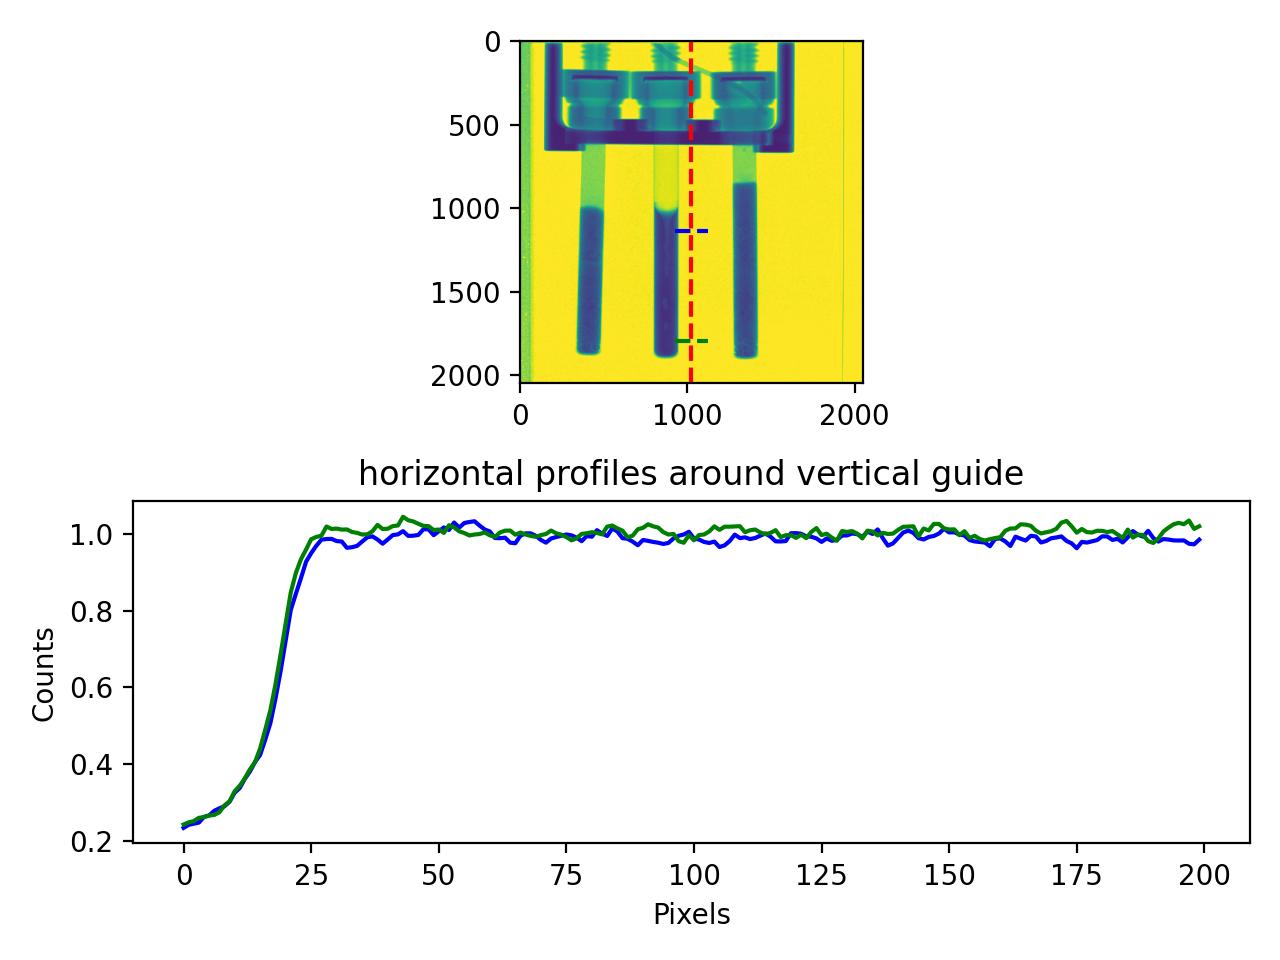

interactive(children=(FloatSlider(value=0.0, description='rot_value', layout=Layout(width='50%'), max=5.0, min…

In [4]:
o_ipts.rotate_images()

# crop sample to region of interest 

By playing with the **left**, **right**, **top** and **bottom** sliders, select a region surrounding the data you want to work with.

Use the **profile marker** to make sure the crop region is tight around the sample.

<html>
    <br>
    <font color="red">Warning:</color>
    </html>

* Make sure you include the container in the selection (edges should have a value of 1)
and 
* a part of the container without sample inside (will be used for normalization)

For example:

<img src='ipts_27939_code/static/example_crop_region.png' />

<IPython.core.display.Javascript object>


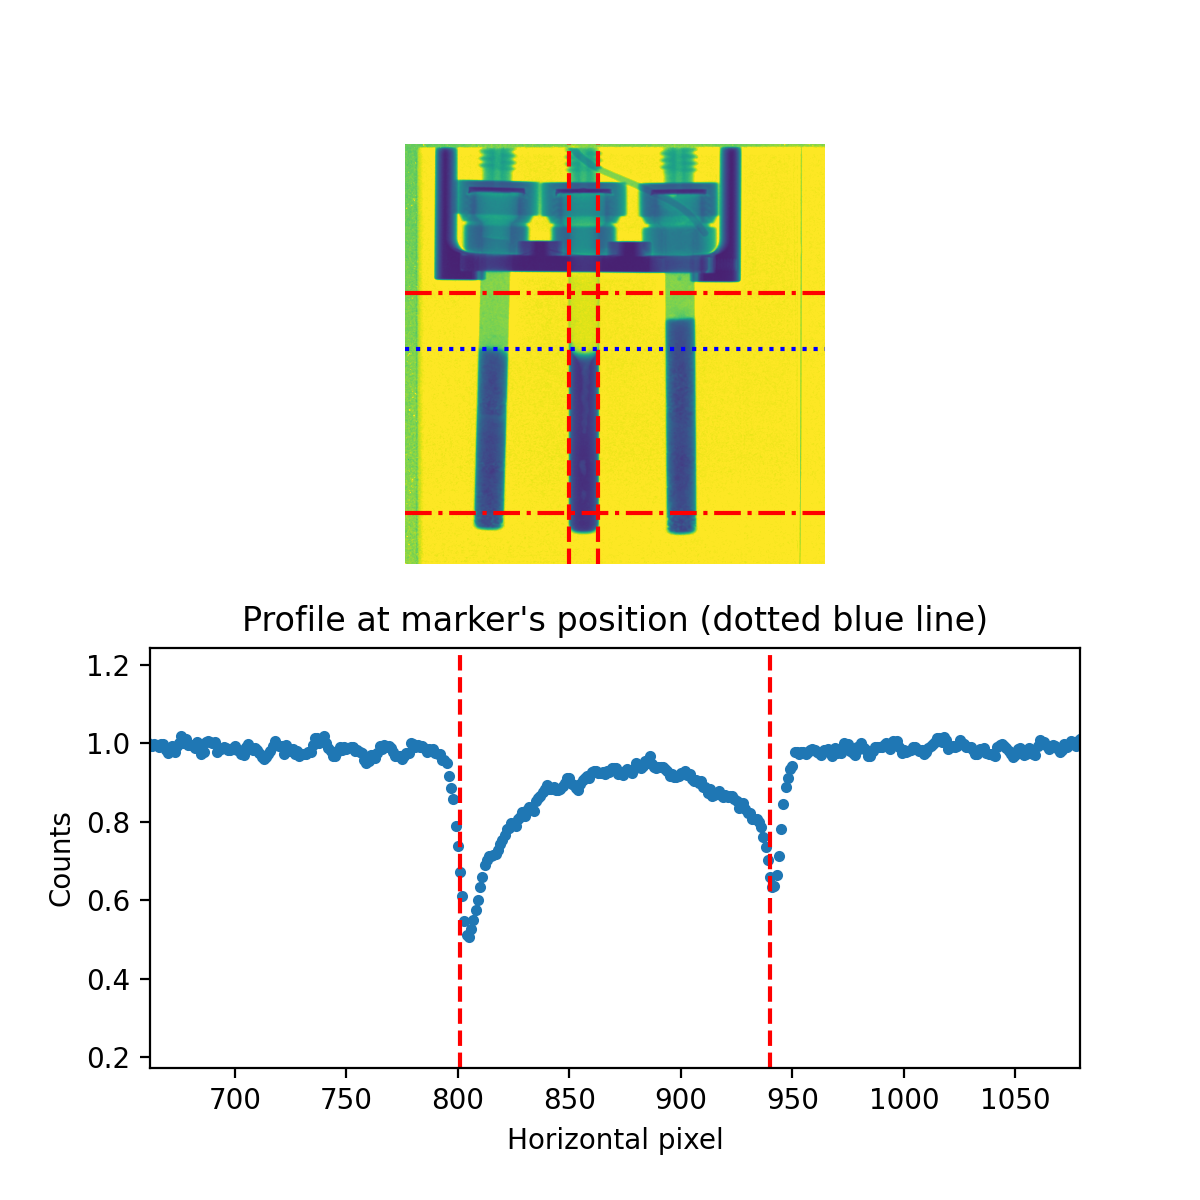

interactive(children=(IntSlider(value=0, description='image_index', max=3), IntSlider(value=801, description='…

In [5]:
o_ipts.apply_rotation()
o_ipts.select_crop_region()

## Visualize result of cropping 

<IPython.core.display.Javascript object>


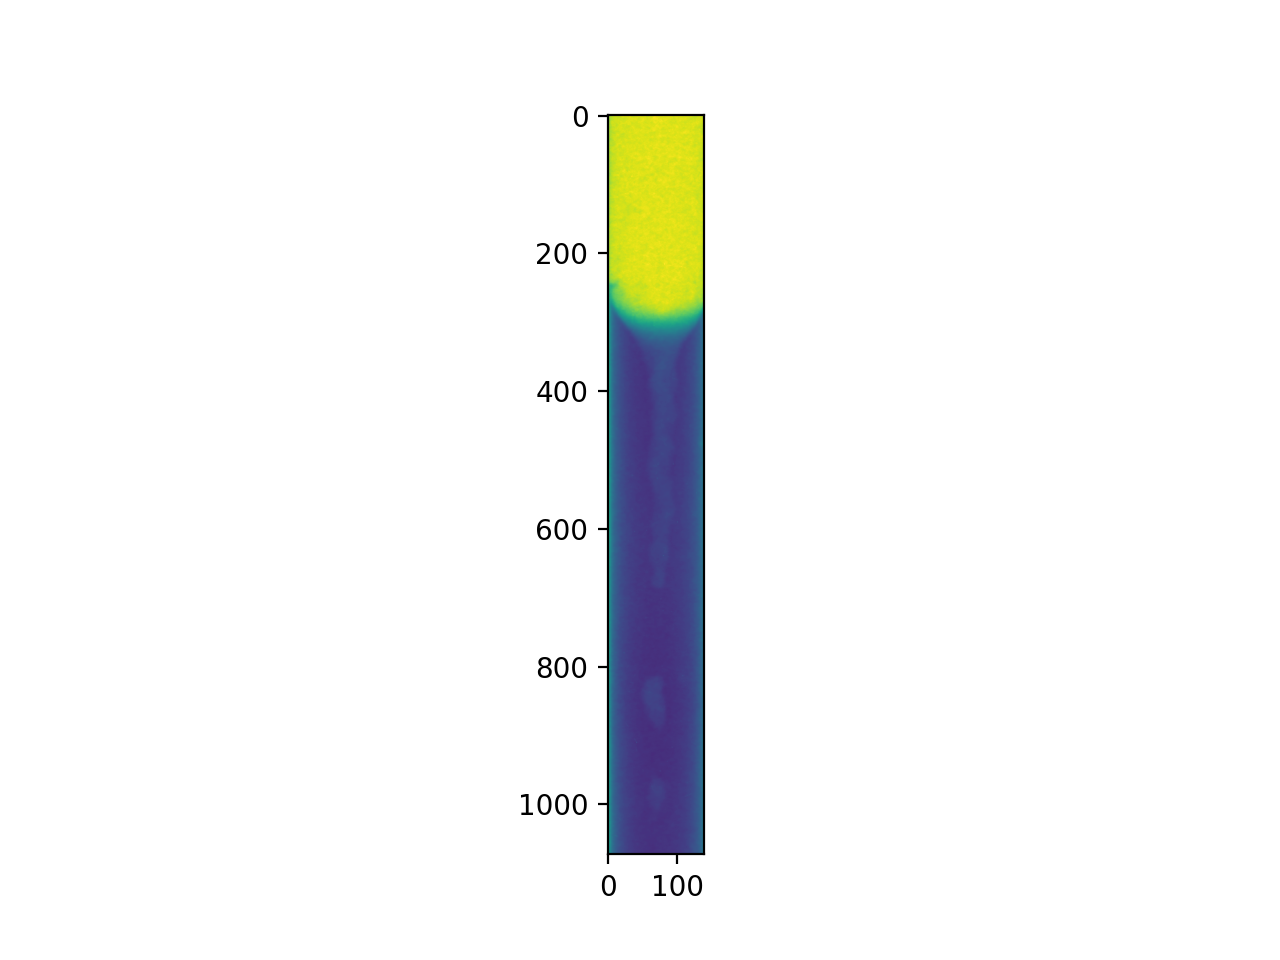

interactive(children=(IntSlider(value=0, description='image_index', max=3), Output()), _dom_classes=('widget-i…

In [6]:
o_ipts.visualize_crop()

## Export cropped images (optional)

In [7]:
o_ipts.export_cropped_images()

IntProgress(value=0, max=3)

# Select background

Select a part of the tube that does not contain the sample. The horizontal profile of this region, integrated over the y-axis, will be used as the background signal to remove from the data.

__for example:__

<img src='ipts_27939_code/static/example_background_selection.png' />

In [ ]:
o_ipts.background_range_selection()

# Select sample

Select the **top** and **bottom** limit of your sample. 

__For example:__

<img src='ipts_27939_code/static/example_of_sample_selection.png' />


In [ ]:
o_ipts.sample_region_selection()

# Removing tube background from sample

In [ ]:
o_ipts.remove_background_signal()

# Profiles to work with 

In [ ]:
o_ipts.display_of_profiles()

# Applying geometry correction 

In [ ]:
o_ipts.correct_cylinder_geometry()

# Export 

This will export:
 - the corrected cropped images
 - the full horizontal profiles of each image

In [ ]:
o_ipts.export_profiles()